In [12]:
import numpy as np
import matplotlib.pyplot as plt 
import PIL 

import torch 
import torch.nn as nn
import torch.optim as optim 
import torch.nn.functional as F 

from torch.autograd import Variable

import _pickle as cPickle

from IPython.display import SVG, display
import svgwrite

import os

from Python.utils import *
from Python.network import *
from Python.cond_model import *


In [13]:
# With 10 classes: 

data1, data_test1 = load_data(hp.data_location1)
#Nmax1 = max_size(data1)

data2, data_test2 = load_data(hp.data_location2)
#Nmax2 = max_size(data2)

data3, data_test3 = load_data(hp.data_location3)
#Nmax3 = max_size(data3)

data4, data_test4 = load_data(hp.data_location4)
#Nmax4 = max_size(data4)

data5, data_test5 = load_data(hp.data_location5)
#Nmax1 = max_size(data1)

data6, data_test6 = load_data(hp.data_location6)
#Nmax2 = max_size(data2)

data7, data_test7 = load_data(hp.data_location7)
#Nmax3 = max_size(data3)

data8, data_test8 = load_data(hp.data_location8)
#Nmax4 = max_size(data4)

data9, data_test9 = load_data(hp.data_location9)
#Nmax3 = max_size(data3)

data10, data_test10 = load_data(hp.data_location10)
#Nmax4 = max_size(data4)

data = np.concatenate((data1, data2, data3, data4, data5, data6, data7, data8, data9, data10), axis = 0) # Training data!
Nmax = max_size(data)



In [14]:
# Create your data_list (with any of the 10 classes)
data_list = [data1, data4, data6, data7] 

data_test_list = [data_test1, data_test4, data_test6, data_test7]

In [80]:
# The new version: 
if __name__ == "__main__":
    model = Cond_Model(hp, Nmax)
    LOSS = []
    LR = []
    LKL = []
    num_classes = len(data_list)
    for step in range(5000):
        loss, lr, lkl = model.train(data_list[step % num_classes], step % num_classes, step)
        if step % 500 == 0:
            LOSS.append(loss)
            LR.append(lr)
            LKL.append(lkl)

Step =  0  done loss =  2.4393718242645264 LR =  2.437562942504883 LKL =  0.0018089100485667586
Step =  500  done loss =  0.6490933895111084 LR =  0.6389565467834473 LKL =  0.010136829689145088
Step =  1000  done loss =  0.47985905408859253 LR =  0.46702131628990173 LKL =  0.012837744317948818
Step =  1500  done loss =  0.393852561712265 LR =  0.3791564106941223 LKL =  0.01469613891094923
Step =  2000  done loss =  0.3176213800907135 LR =  0.3018918037414551 LKL =  0.015729587525129318
Step =  2500  done loss =  0.3331959545612335 LR =  0.31508561968803406 LKL =  0.018110333010554314
Step =  3000  done loss =  0.26203063130378723 LR =  0.24276769161224365 LKL =  0.019262949004769325
Step =  3500  done loss =  0.22285029292106628 LR =  0.20218804478645325 LKL =  0.02066224254667759
Step =  4000  done loss =  0.1986435055732727 LR =  0.17662650346755981 LKL =  0.022017009556293488
Step =  4500  done loss =  0.174890398979187 LR =  0.15185166895389557 LKL =  0.023038724437355995


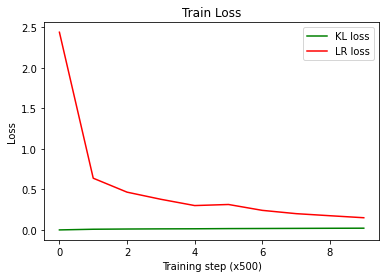

In [81]:
### Plot the Losses after the training: 

plt.figure()
#plt.plot(LOSS,'b',label="train loss")
plt.plot(LKL,'g', label="KL loss")
plt.plot(LR,'r', label="LR loss")
plt.title('Train Loss')
plt.xlabel('Training step (x500)')
plt.ylabel('Loss')
plt.legend()
#plt.savefig('plot.png')  # save the plot

Input


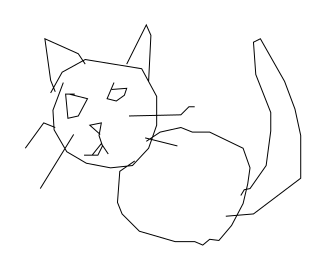

output


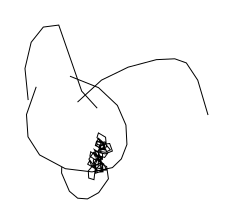

Input


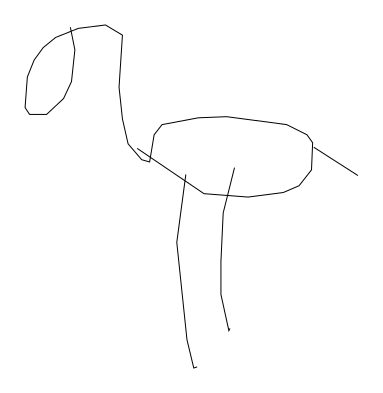

output


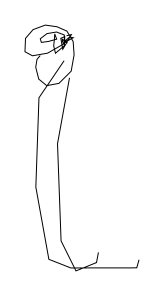

Input


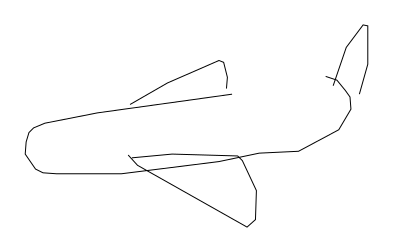

output


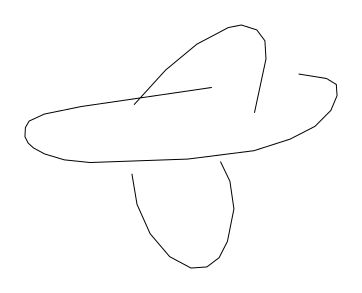

Input


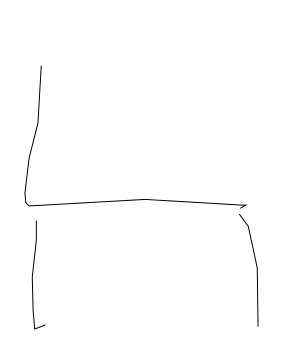

output


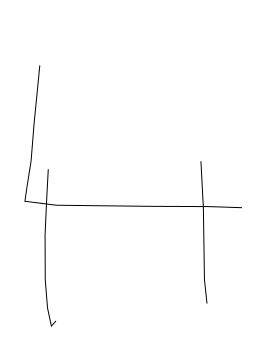

Input


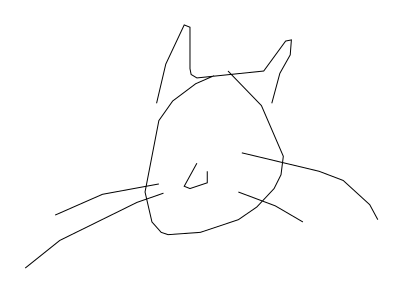

output


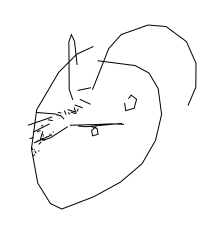

Input


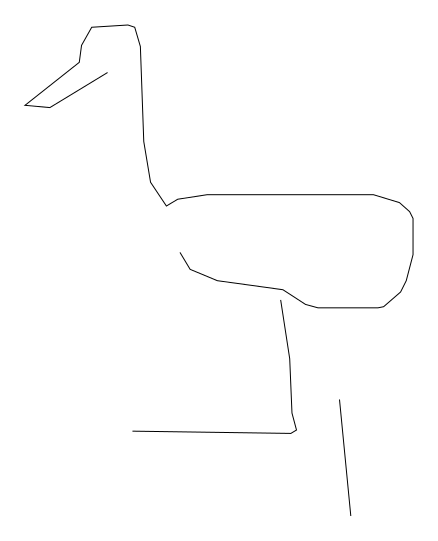

output


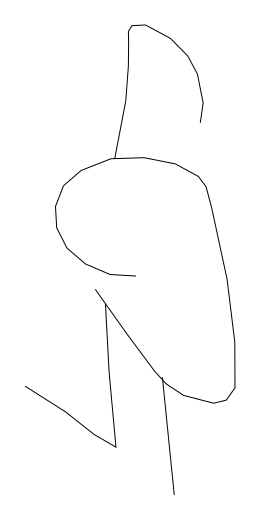

Input


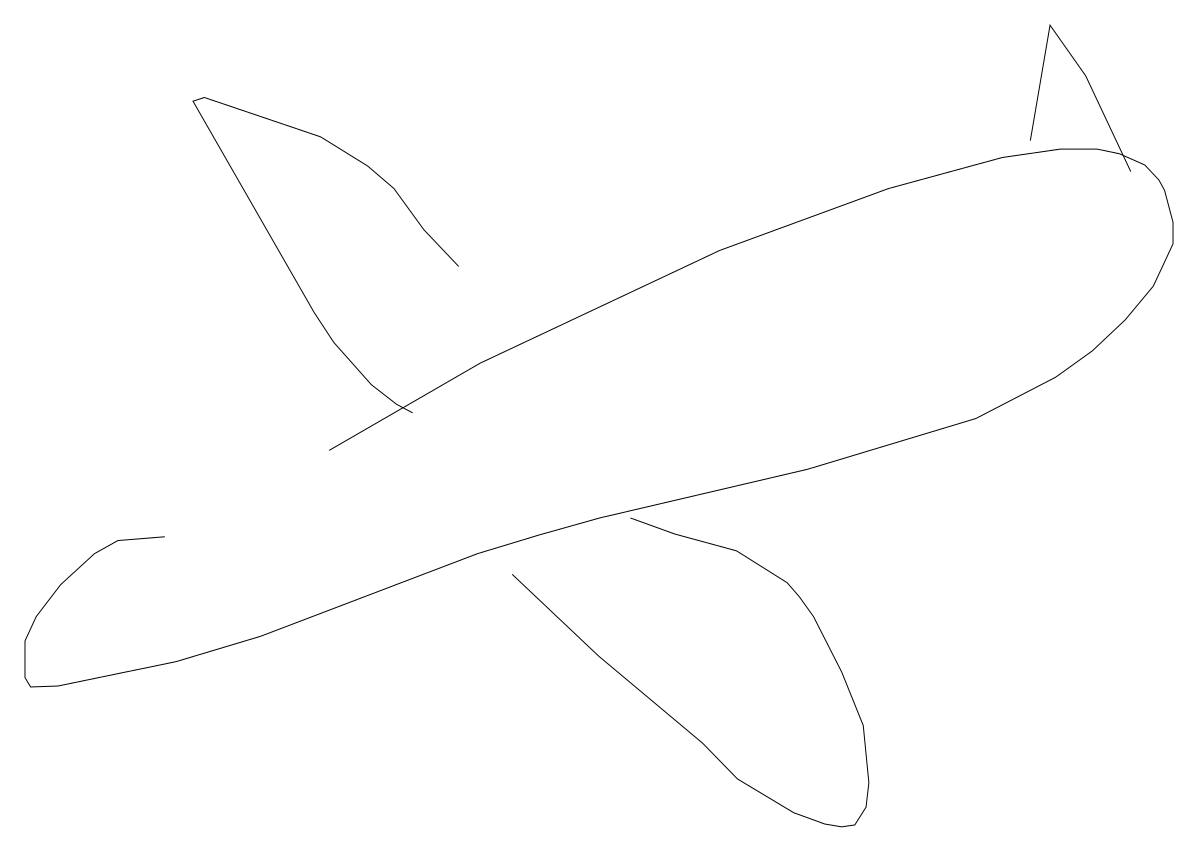

output


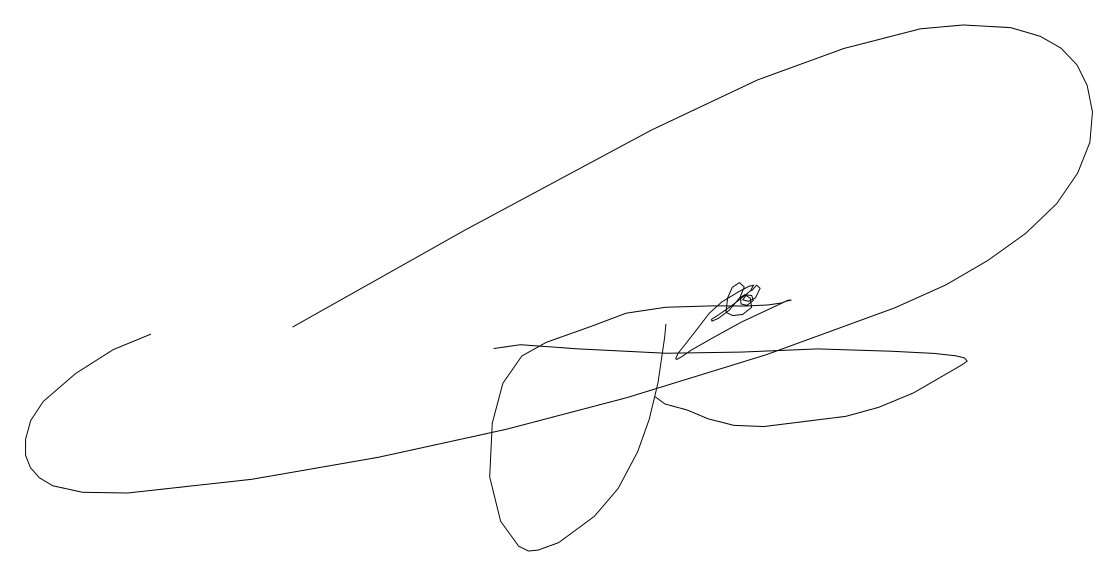

Input


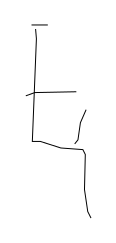

output


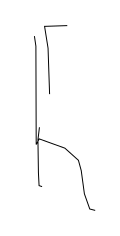

Input


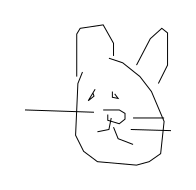

output


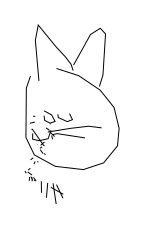

Input


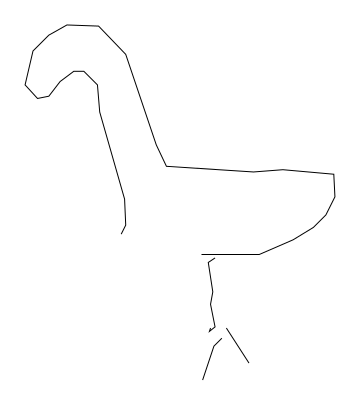

output


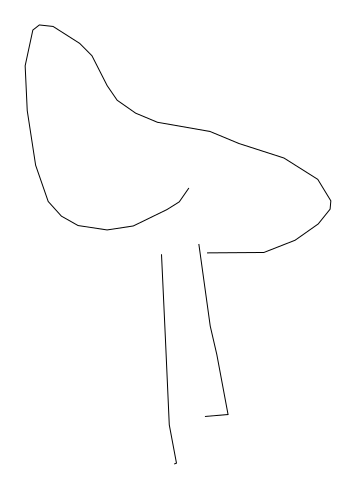

In [83]:
list1 = []
len = len(data_list)

for i in range(10):
    input, output = model.conditional_generation(data_test_list[i % len], i % len)        
    input = to_normal_strokes(input[:, 0, :].cpu().numpy())
    list1.append((input, output))


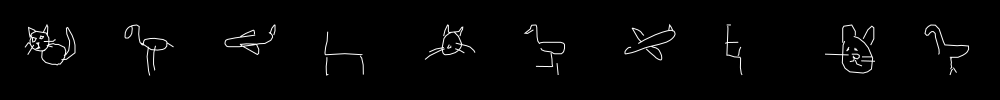

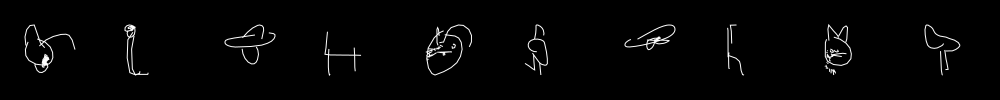

In [84]:
list_input1 = []
list_output1 = []


for i in range(10):
    input1, output1 = list1[i]
    scale_bound(input1)
    scale_bound(output1)
    list_input1.append(input1)
    list_output1.append(output1)


#print(" #############  Input ############")
draw_grid(list_input1)

#print(" #############  Output ############")
draw_grid(list_output1)


Input


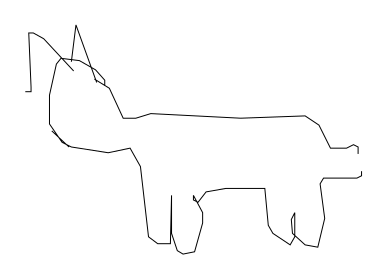

output


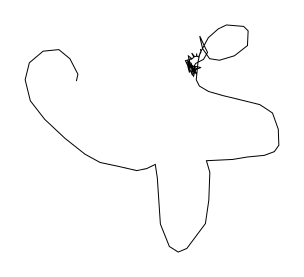

Input


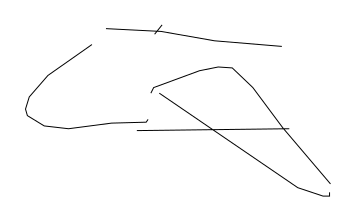

output


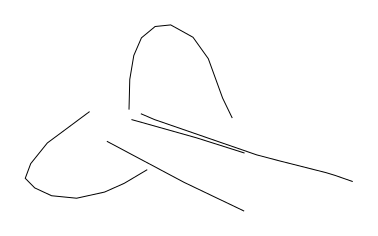

Input


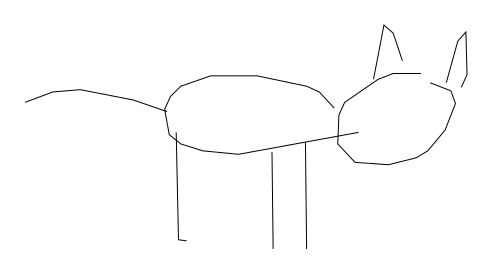

output


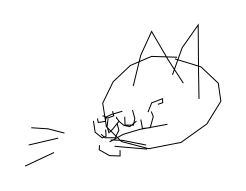

Input


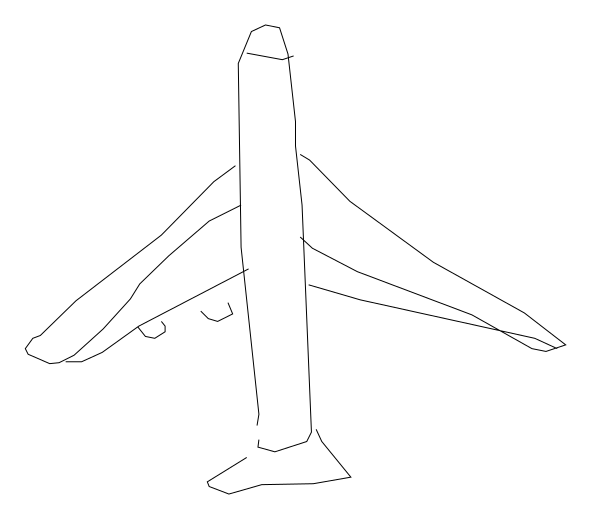

output


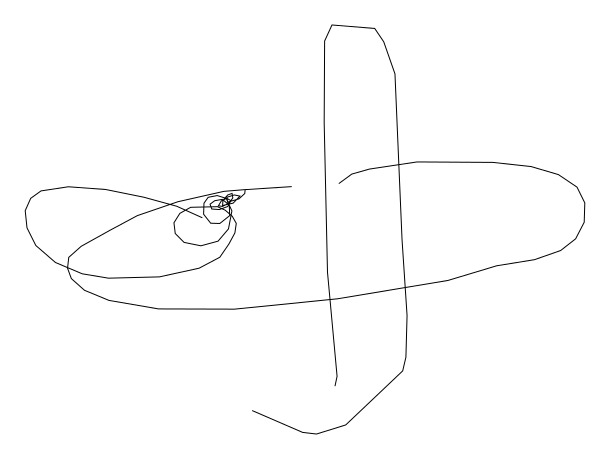

Input


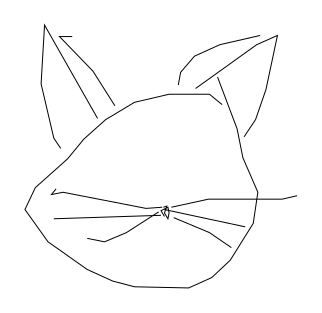

output


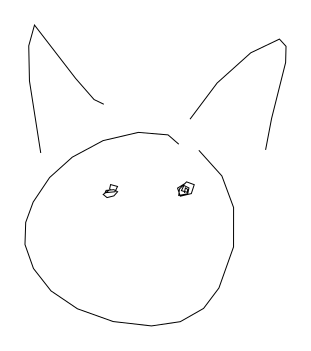

Input


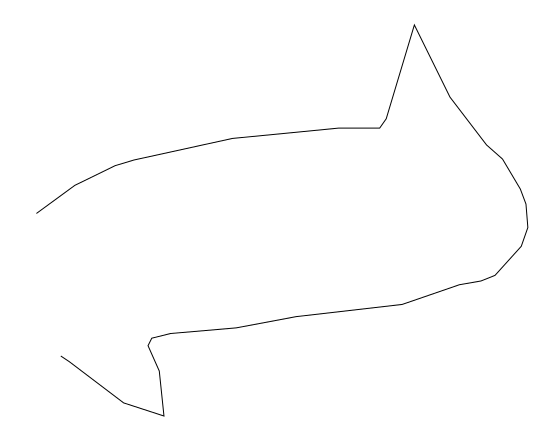

output


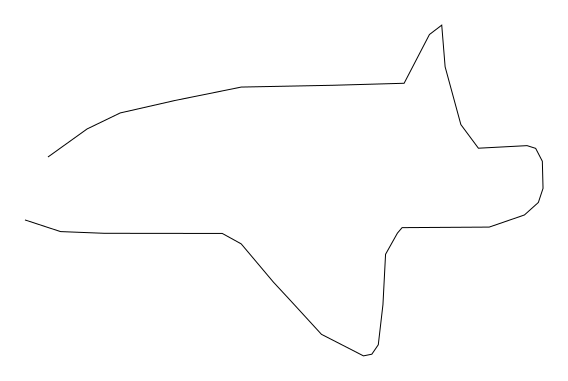

Input


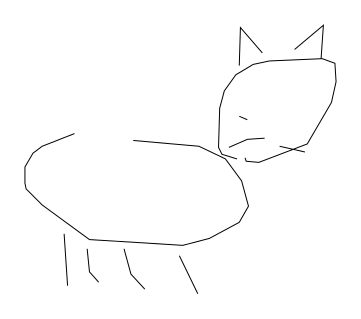

output


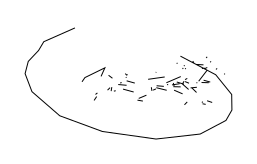

Input


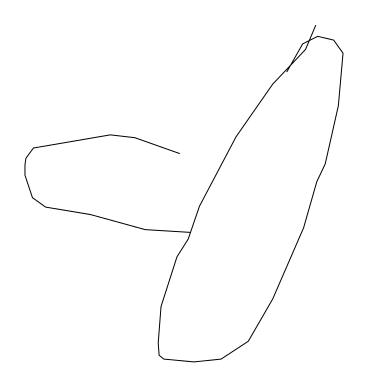

output


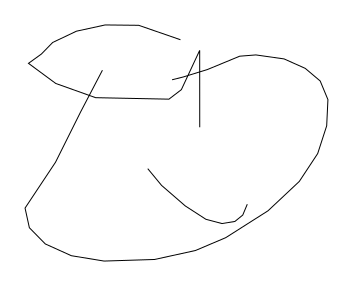

Input


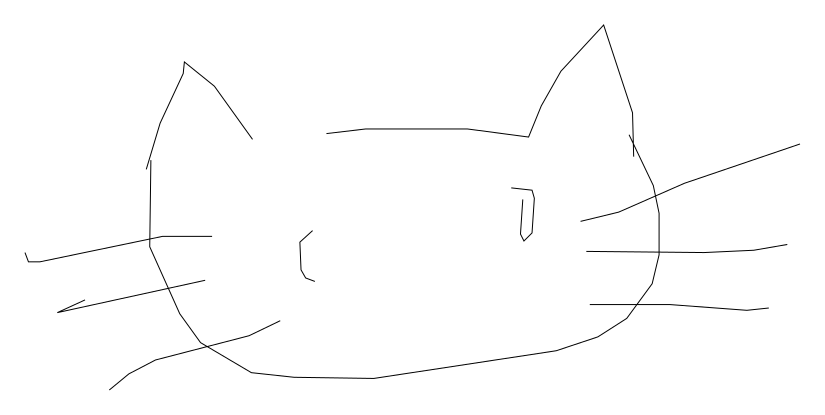

output


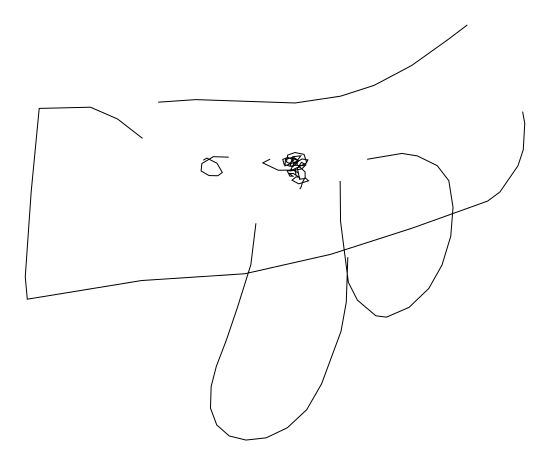

Input


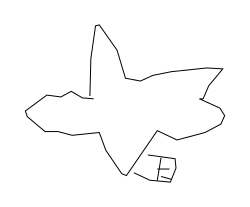

output


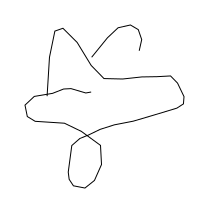

Input


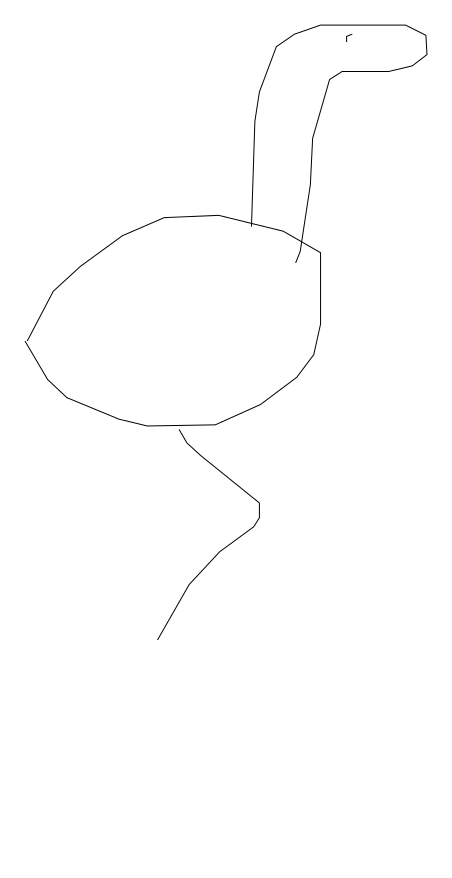

output


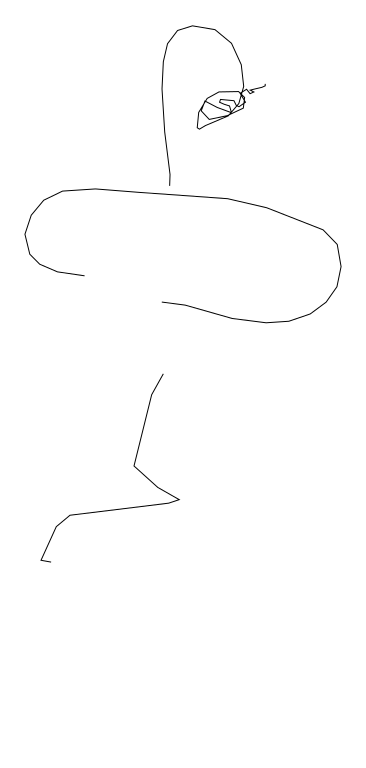

Input


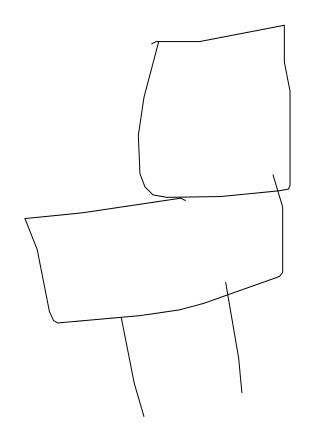

output


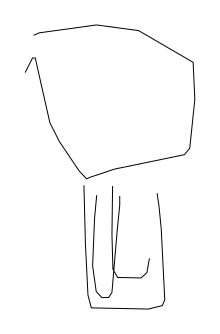

Input


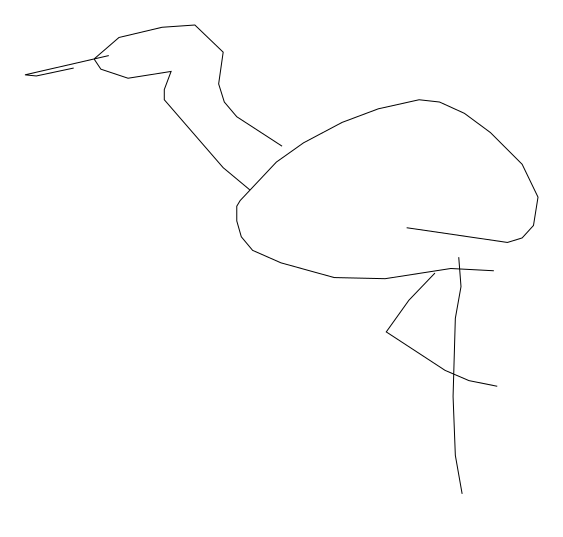

output


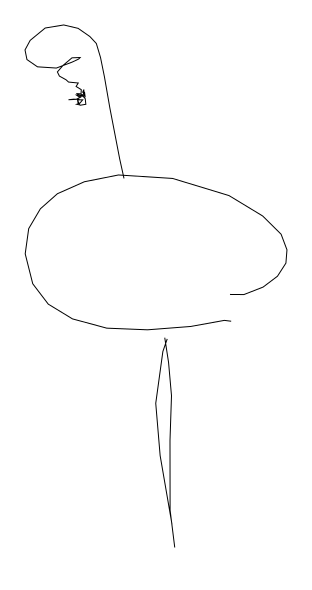

Input


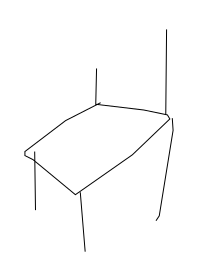

output


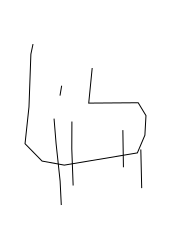

Input


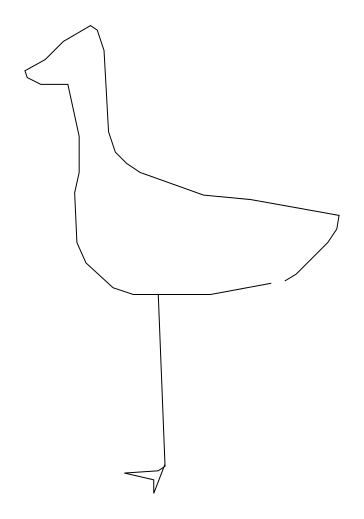

output


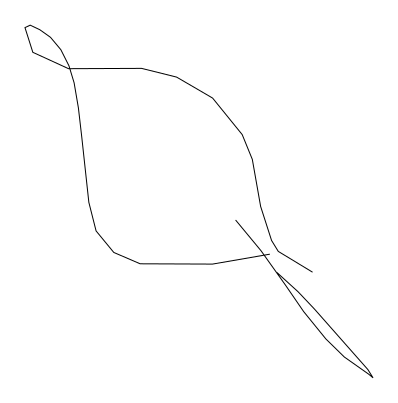

Input


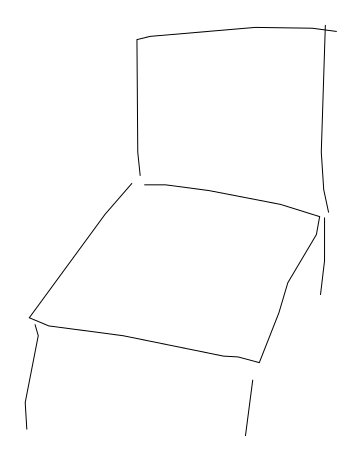

output


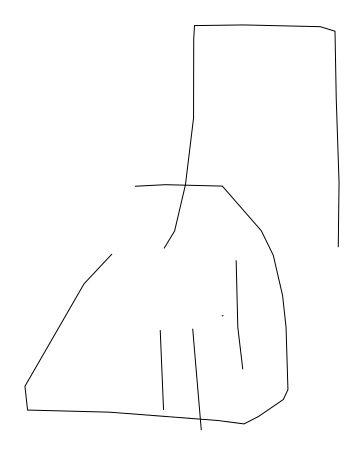

Input


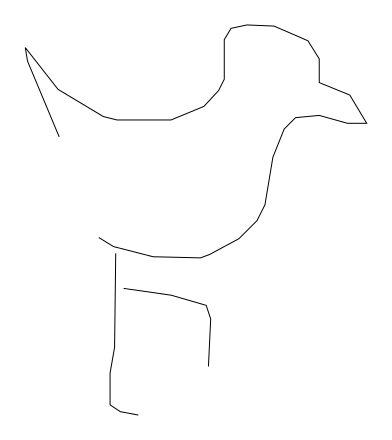

output


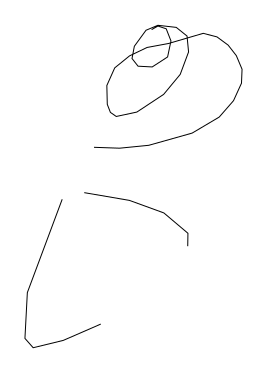

Input


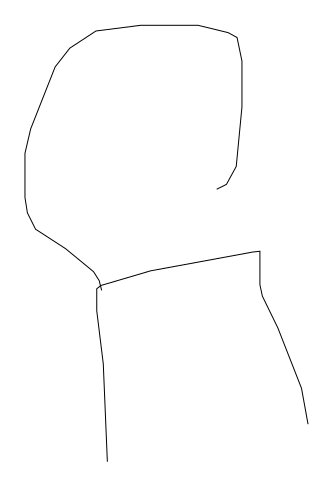

output


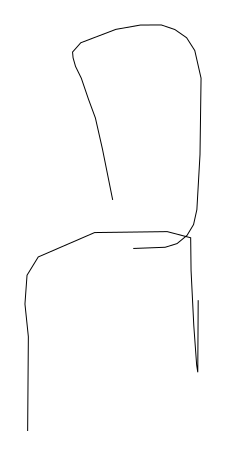

Input


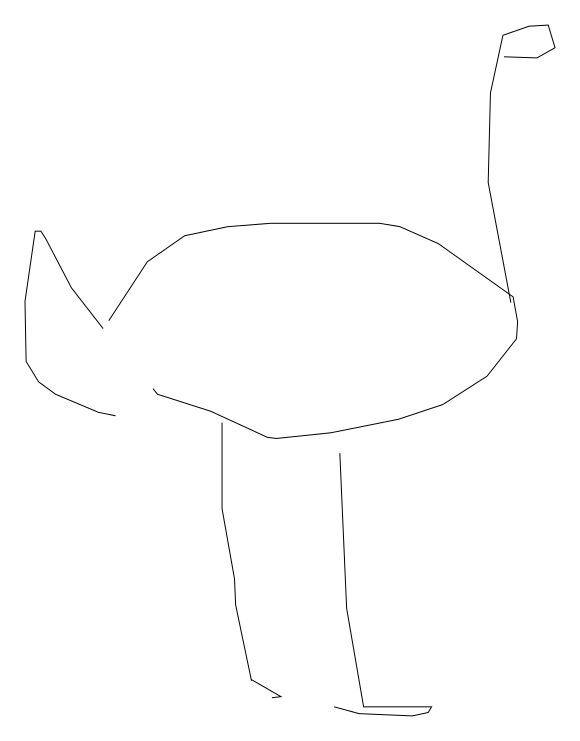

output


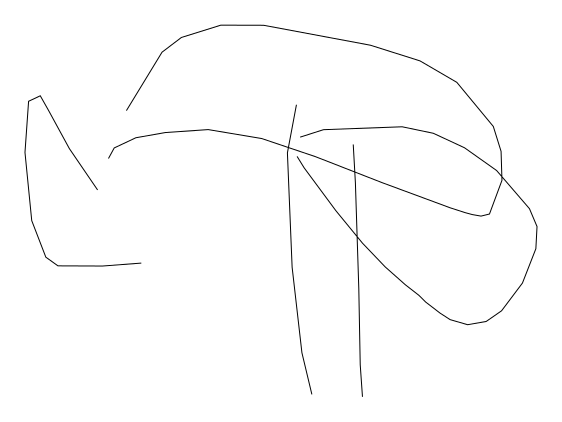

Input


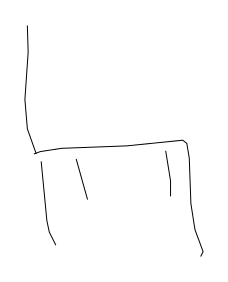

output


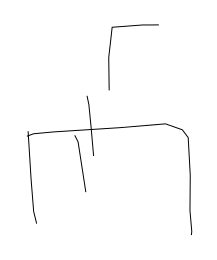

In [86]:
list1 = []
list2 = []

for i in range(10):
    if (i<5):
        input, output = model.conditional_generation(data_test_list[0], 0)
        input2, output2 = model.conditional_generation(data_test_list[2], 2)
    else :
        input, output = model.conditional_generation(data_test_list[1], 1)
        input2, output2 = model.conditional_generation(data_test_list[3], 3)
        
    input = to_normal_strokes(input[:, 0, :].cpu().numpy())
    input2 = to_normal_strokes(input2[:, 0, :].cpu().numpy())
    list1.append((input, output))
    list2.append((input2, output2))

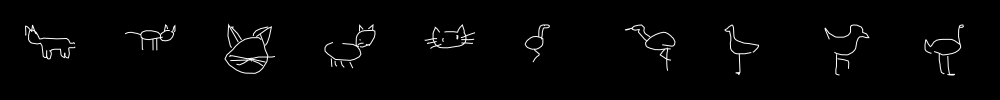

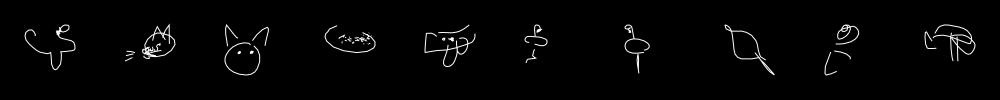

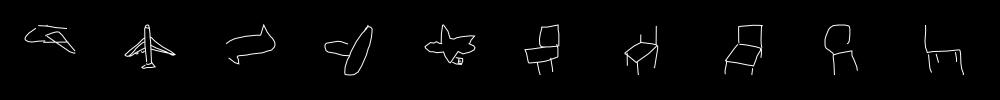

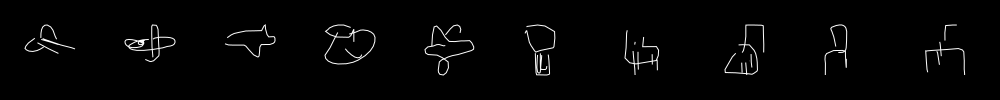

In [87]:
list_input1 = []
list_output1 = []

list_input2 = []
list_output2 = []



for i in range(10):
    input1, output1 = list1[i]
    input2, output2 = list2[i]
    scale_bound(input1)
    scale_bound(input2)
    scale_bound(output1)
    scale_bound(output2)
    list_input1.append(input1)
    list_output1.append(output1)
    list_input2.append(input2)
    list_output2.append(output2)


#print(" #############  Input ############")
draw_grid(list_input1)

#print(" #############  Output ############")
draw_grid(list_output1)

#print(" #############  Input ############")
draw_grid(list_input2)

#print(" #############  Output ############")
draw_grid(list_output2)

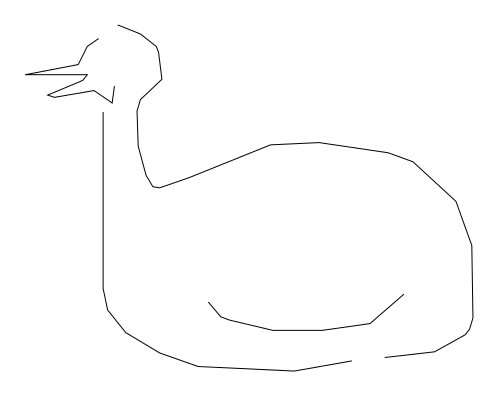

In [88]:
# Test with a single image from a dataset: 


batch, lengths = make_batch(data_test_list[1], Nmax, 1)
model.encoder.train(False)
model.decoder.train(False)
# encode:
z1, _, _ = model.encoder(batch, 1)

batch.shape
batch = torch.squeeze(batch)
batch.shape
batch_visu = batch.detach().cpu().numpy()
draw_strokes(to_normal_strokes(batch_visu), display_image= True)

In [95]:
cond = (torch.ones([1, 1]) * 0).to(device)
z = (torch.cat((z1, cond), axis = 1))

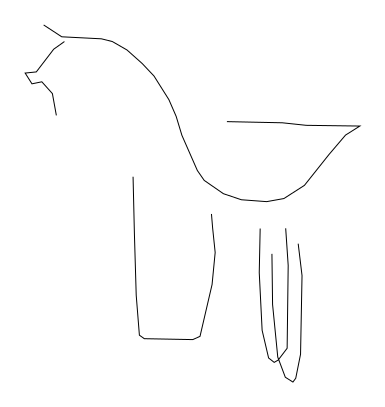

array([[-0.35798105,  0.12602733,  0.        ],
       [-0.21523607,  0.15378523,  0.        ],
       [-0.34820719,  0.45460409,  0.        ],
       [-0.22324892,  0.02309704,  0.        ],
       [ 0.1363423 ,  0.21539529,  0.        ],
       [ 0.19772837, -0.04040216,  0.        ],
       [ 0.21155663,  0.23616651,  0.        ],
       [ 0.07916384,  0.43693304,  1.        ],
       [-0.25423788, -1.81178597,  0.        ],
       [ 0.3619994 ,  0.23695712,  0.        ],
       [ 0.79567516,  0.04052846,  0.        ],
       [ 0.21688453,  0.05435191,  0.        ],
       [ 0.29404998,  0.16869361,  0.        ],
       [ 0.30465645,  0.27139373,  0.        ],
       [ 0.23717188,  0.25068822,  0.        ],
       [ 0.29851348,  0.473858  ,  0.        ],
       [ 0.14523875,  0.33416286,  0.        ],
       [ 0.11523178,  0.38036479,  0.        ],
       [ 0.30933938,  0.70427658,  0.        ],
       [ 0.13756661,  0.1986072 ,  0.        ],
       [ 0.3840552 ,  0.26605787,  0.   

In [96]:
cond_decoding(z, model, Nmax, draw=True)